<h1 style= 'color: cornflowerblue'> Project 1 - Exploratory Data Analysis </h1>


<h2 style= 'color: cornflowerblue'>Motivation and Goals</h2>

<p> This study will be conducted with data from the 2019 ENEM (Brazil's Nacional High School's Exam). It's data is from <a href = "https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem">INEP</a>.</p>

<img src = "CRISP-DM_Projeto1.png">

<p> The project will focus on the first and second pahses of CRISP-DM. they are:
<ul type = 'circle'>
<li> Business Understanding: Objectives and Requirements.
    <ul type = 'circle'>
    <li> Determine business objectives: Understand, from a business perspective, what the customer really wants to accomplish and then define success criteria.
    <li> Assess situation: Determine resources availability, project requirements, risks and contigencies and cost-benefit analysis.
    <li> Determine data mining goals: determine success from a technical data minig perspectiive.
    <li> Produce project plan: Select technologies/tools and define plans for each project phase
    </ul>
<br>
<li> Data Understanding: Identify, collect and analyze data sets.
    <ul type = 'circle'>
    <li> Collect Initial Data: Acquire the necessary data and load into the analysis tool.
    <li> Describe Data: Examine and document the data properties, formats, records (and its numbers) and identities.
    <li> Explore Data: Query, visualize and identify relations.
    <li> Verify Data Quality: Document any quality issues with the data.
    </ul>

<p> This study becomes relevant once ENEM grade can be used for several objectives:<br>
<ul type='circle'>
<li> Sistema de Seleção Unificada (Sisu) - centralized system that uses ENEM grades for applying for universities;
<li> Programa Universidade para Todos (ProUni) - Government program for scholarships to low-income students;
<li> Accepted in more than 50 universities from Portugal;
<li> Student Loans Programs;
<li> Gathers data for educational studies and indicators.<a href = "https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem">[1]</a></ul></p>
<br>
<p> The goal of the current study is to asessess whether demographic factors, social background, parental education level and other indicators of applicants have any correlation with their grades.

<h2 style= 'color: cornflowerblue'>Import Libraries</h2>

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as px

import os

In [2]:
# Configuring Pandas to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuring Pandas to not show numbers in scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<h2 style= 'color: cornflowerblue'>Data Frame</h2>

In [3]:
# Getting the full data
df_enem = pd.read_parquet("./Data/enem_2019_Full.parquet")

In [4]:
# In case of working with a smaller sample, remove the # from the code bellow:
# In the current case it is set to 10%.

# df_enem10 = df_enem.sample(n=len(df_enem)//10, random_statate=42, replace = False)
# df_enem10.to_parquet("./Data/enem_2019_10.parquet")

In [5]:
# Shape of the data frame
df_enem.shape

(5095270, 136)

In [6]:
df_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.00,M,1,3,1,2914802.00,Itabuna,29.00,BA,1,11,1,NaN,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.00,M,1,1,1,2910800.00,Feira de Santana,29.00,BA,1,5,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.00,F,1,3,1,2304400.00,Fortaleza,23.00,CE,1,13,1,1.00,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.00,F,1,1,1,1721000.00,Palmas,17.00,TO,1,4,1,NaN,0,NaN,NaN,None,NaN,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1721000,Palmas,17,TO,1,1,1,1,504.00,510.00,513.00,516.00,483.80,503.60,537.30,392.00,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEA...,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.00,F,1,1,1,3118601.00,C

In [7]:
# Checking for duplicates.

df_enem.shape[0] - len(df_enem['NU_INSCRICAO'].unique())

0

In [8]:
df_enem.dtypes

NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC   

<h3 style='color: cornflowerblue'>Study Metrics</h3>
<p> For the study, a few of these columns are not going to be used. They are:
    <ul style = 'circle'>
    <li>Columns starting with 'TX': they show the applicants answers and the answer key of the subjects;
    <li>Columns starting with 'CO': they show the code of the information (some short of ID);
    <li>Columns with 'MUNICIPIO': the study is not going to consider and trace metrics for each city;
    <li>Column 'NU_INSCRICAO': the registration number is not relevant for this study;
    <li>Column 'NU_ANO': the year is already set. This columns is irrelevant for this study.

In [9]:
columns_tx = [columns for columns in df_enem.columns if columns.startswith('TX')]
columns_tx

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [10]:
columns_co = [columns for columns in df_enem.columns if columns.startswith('CO')]
columns_co

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [11]:
columns_municipio = [columns for columns in df_enem.columns if 'MUNICIPIO' in columns]
columns_municipio

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [12]:
rem_columns = columns_tx + columns_co + columns_municipio + ['NU_INSCRICAO', 'NU_ANO']
rem_columns

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'NU_INSCRICAO',
 'NU_ANO']

In [13]:
df_enem = df_enem.drop(rem_columns, axis='columns')
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


In [14]:
df_enem.shape

(5095270, 109)

<h3 style='color: cornflowerblue'>Data Information</h3>

<p>The data is accompanied with a dictionary describing what each column represents:</p>
<br>
<p>Marital Status (TP_ESTADO_CIVIL)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Not Informesd</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Single</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Married / Stable Union</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Divorced</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Widowed</td>
    </tr>
</table>
</p>
<br>

<p>Ethnicity (TP_COR_RACA)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Not Informed</td>
    </tr>
    <tr>
        <td>1</td>
        <td>White</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Black</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Brown</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Yellow</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Indigenous</td>
    </tr>
</table>
</p>
<br>
<p>Nacionality (TP_NACIONALIDADE)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>0</td>
        <td>Not Informed</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Brazilian</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Brazilian Naturalized</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Foreign</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Brazilian, Born Abroad</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Indigenous</td>
    </tr>
</table>
</p>
<br>
<p>Education (TP_ST_CONCLUSAO)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>High School Completed</td>
    </tr>
    <tr>
        <td>2</td>
        <td>High School Graduation in 2019</td>
    </tr>
    <tr>
        <td>3</td>
        <td>High School Graduation after 2019</td>
    </tr>
    <tr>
        <td>4</td>
        <td>High School not Completed / Not in High School</td>
    </tr>
</table>
</p>
<br>
<p>Parents Education (Q001 , Q002)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>A</td>
        <td>Never Studied</td>
    </tr>
    <tr>
        <td>B</td>
        <td>Did not finish 4th or 5th grade</td>
    </tr>
    <tr>
        <td>C</td>
        <td>Finish 4th or 5th grade, but not 8th or 9th</td>
    </tr>
    <tr>
        <td>D</td>
        <td>Finish 8th or 9th grade, but not high school</td>
    </tr>
    <tr>
        <td>E</td>
        <td>Finish high school, but not university</td>
    </tr>
    <tr>
        <td>F</td>
        <td>Finish university, but not post graduation</td>
    </tr>
    <tr>
        <td>G</td>
        <td>Finish post graduation</td>
    </tr>
    <tr>
        <td>H</td>
        <td>Don't know</td>
    </tr>
</table>
</p>
<br>
<p>Family Income (Q006)
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>A</td>
        <td>Not Informed</td>
    </tr>
    <tr>
        <td>B</td>
        <td>Up to R$998,00</td>
    </tr>
    <tr>
        <td>C</td>
        <td>From R$998,01 to R$1497,00</td>
    </tr>
    <tr>
        <td>D</td>
        <td>From R$1497,01 to R$1996,00</td>
    </tr>
    <tr>
        <td>E</td>
        <td>From R$1996,01 to R$2495,00</td>
    </tr>
    <tr>
        <td>F</td>
        <td>From R$2495,01 to R$2994,00</td>
    </tr>
    <tr>
        <td>G</td>
        <td>From R$2994,01 to R$3992,00</td>
    </tr>
    <tr>
        <td>H</td>
        <td>From R$3992,01 to R$4990,00</td>
    </tr>
    <tr>
        <td>I</td>
        <td>From R$4990,01 to R$5988,00</td>
    </tr>
    <tr>
        <td>J</td>
        <td>From R$6986,01 to R$6986,00</td>
    </tr>
    <tr>
        <td>K</td>
        <td>From R$6986,01 to R$7984,00</td>
    </tr>
    <tr>
        <td>L</td>
        <td>From R$7984,01 to R$8982,00</td>
    </tr>
    <tr>
        <td>M</td>
        <td>From R$8982,01 to R$9980,00</td>
    </tr>
    <tr>
        <td>N</td>
        <td>From R$9980,01 to R$11976,00</td>
    </tr>
    <tr>
        <td>O</td>
        <td>From R$11976,01 to R$14970,00</td>
    </tr>
    <tr>
        <td>P</td>
        <td>From R$14970,01 to R$19960,00</td>
    </tr>
    <tr>
        <td>Q</td>
        <td>More than R$19960,00</td>
    </tr>
</table>
</p>
<br>
<p>Grades
<table>
    <tr>
        <th>Code</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>NU_NOTA_CN</td>
        <td>Grade in Nature Sciences</td>
    </tr>
    <tr>
        <td>NU_NOTA_CH</td>
        <td>Grade in Human Sciences</td>
    </tr>
    <tr>
        <td>NU_NOTA_LC</td>
        <td>Grade in Language and Codes</td>
    </tr>
    <tr>
        <td>NU_NOTA_MT</td>
        <td>Grade in Mathematics</td>
    </tr>
    <tr>
        <td>NU_NOTA_REDACAO</td>
        <td>Grade in Essay</td>
    </tr>
</table>
</p>

<h2 style="color:cornflowerblue">Descriptive Statistics</h2>

In [15]:
df_enem.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5095201.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,2878197.00,5095270.00,1147412.00,1147412.00,1147412.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,3710433.00,3923145.00,3923145.00,3710433.00,5095270.00,3923144.00,3923144.00,3923144.00,3923144.00,3923144.00,3923144.00,3923144.00,5095270.00
mean,22.09,1.08,2.13,1.03,1.54,2.96,1.33,1.00,0.12,2.25,1.04,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.77,0.77,0.73,477.82,507.25,520.52,523.12,0.52,1.14,120.48,122.74,114.81,121.63,91.53,571.19,3.87
std,7.45,0.44,1.02,0.21,0.72,4.11,0.55,0.07,0.33,0.75,0.19,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.04,0.02,0.01,0.02,0.01,0.02,0.02,0.03,0.01,0.00,0.03,0.01,0.01,0.03,0.04,0.04,0.03,0.01,0.05,0.01,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.45,0.42,0.42,0.45,76.10,82.41,64.15,109.06,0.50,0.79,33.43,42.93,40.18,38.12,59.44,188.76,1.48
min,10.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,18.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,417.80,447.90,483.50,435.10,0.00,1.00,120.00,120.00,100.00,100.00,40.00,480.00,3.00
50%,19.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [16]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 109 entries, SG_UF_RESIDENCIA to Q025
dtypes: float64(16), int64(64), object(29)
memory usage: 4.1+ GB


In [17]:
# List of columns with Grades
columns_grades = [column for column in df_enem if 'NOTA' in column]
columns_grades

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [18]:
# The comlumns 'NU_NOTA_COMP1' to 'NU_NOTA_COMP5' are parts of the essay. For this study, only the full grade will be considered ('NU_NOTA_REDACAO').

columns_grades = [column for column in columns_grades if 'COMP' not in column]
columns_grades

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

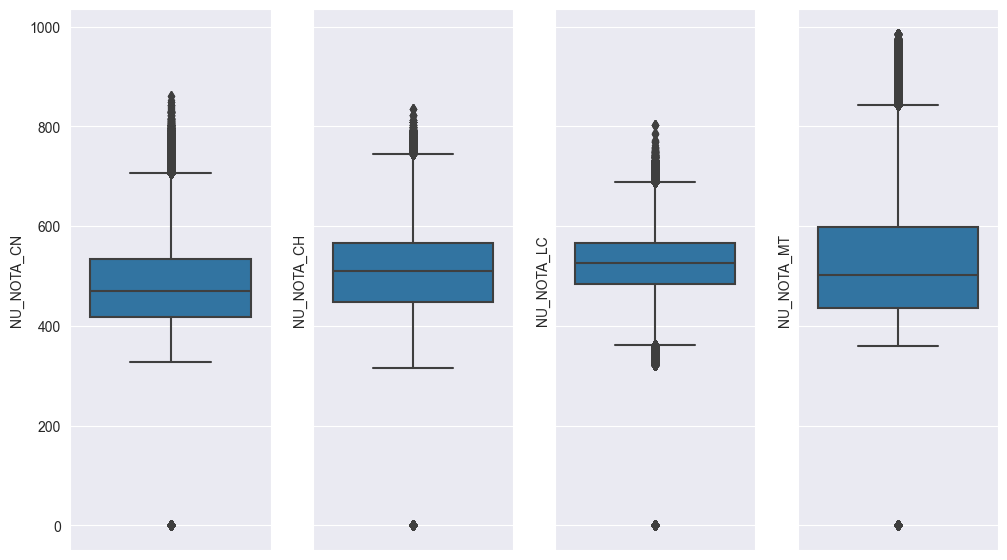

In [19]:
# Analyzing the Grades
sns.set_style("darkgrid")
figure, axes = plt.subplots(nrows = 1, ncols = 4, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(4):
    column_axes = columns_grades[i]
    sns.boxplot(data=df_enem, y=column_axes, ax=axes[i])

<Figure size 1000x600 with 0 Axes>

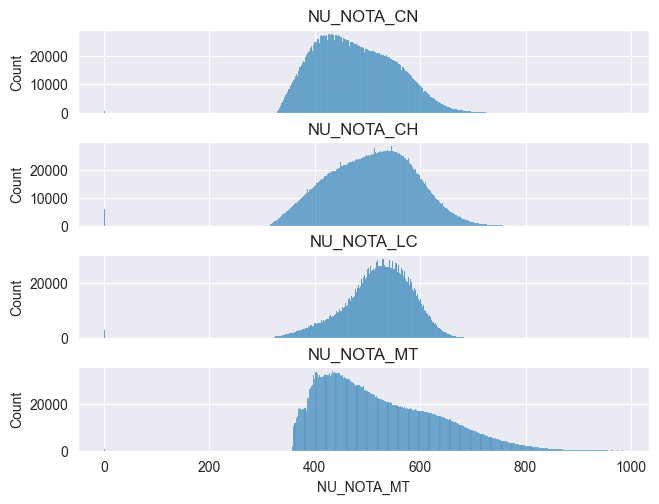

In [20]:
# Analyzing the Grades Distribution

sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
figure,  axes = plt.subplots(4, 1, sharex = True)
plt.tight_layout()

for i in range(4):
    column_axes = columns_grades[i]
    sns.histplot(data=df_enem[column_axes], ax = axes[i]).set_title(column_axes)


Text(0.5, 1.0, 'NU_NOTA_REDACAO')

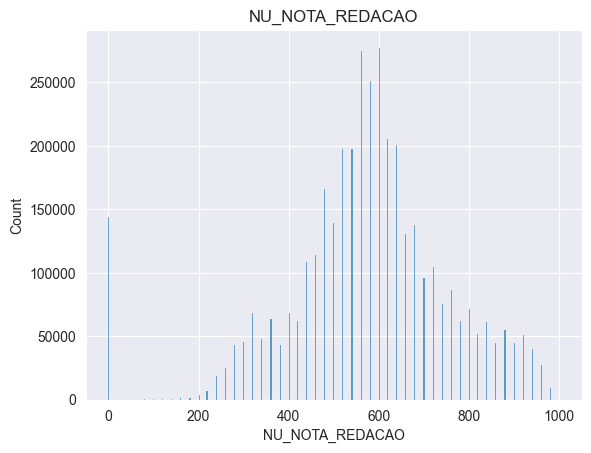

In [21]:
# Analyzing the Essay Grades

sns.histplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

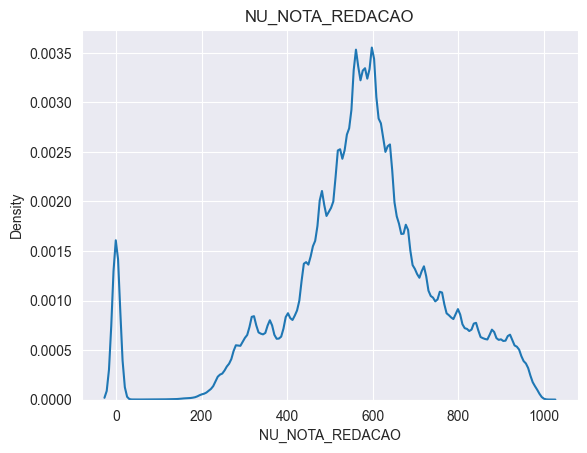

In [22]:
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

<h2 style="color:cornflowerblue">Demographic Information</h2>

In [23]:
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B


In [24]:
# If working with part of the dataset, reset the index for better visualization:

# df_enem = df_enem.reset_indes(drop = True)
# df_enem.head()

<h3 style="color:cornflowerblue">Visualizing Age</h3>

In [25]:
df_enem['NU_IDADE'].value_counts().sort_index()

NU_IDADE
10.00         6
11.00         9
12.00        46
13.00       266
14.00      5267
15.00     78563
16.00    316437
17.00    847303
18.00    864186
19.00    577161
20.00    409385
21.00    290311
22.00    233036
23.00    187681
24.00    156262
25.00    128042
26.00    106880
27.00     89618
28.00     78008
29.00     66783
30.00     62491
31.00     56633
32.00     50252
33.00     46774
34.00     42821
35.00     38584
36.00     36476
37.00     35197
38.00     32656
39.00     28629
40.00     25991
41.00     22675
42.00     20411
43.00     18551
44.00     16508
45.00     15183
46.00     13509
47.00     12565
48.00     11107
49.00      9950
50.00      8799
51.00      7698
52.00      6981
53.00      6200
54.00      5527
55.00      4781
56.00      4058
57.00      3624
58.00      2774
59.00      2386
60.00      1901
61.00      1602
62.00      1384
63.00      1075
64.00       849
65.00       713
66.00       531
67.00       495
68.00       366
69.00       306
70.00       221
71.00       174

<Axes: xlabel='NU_IDADE', ylabel='Density'>

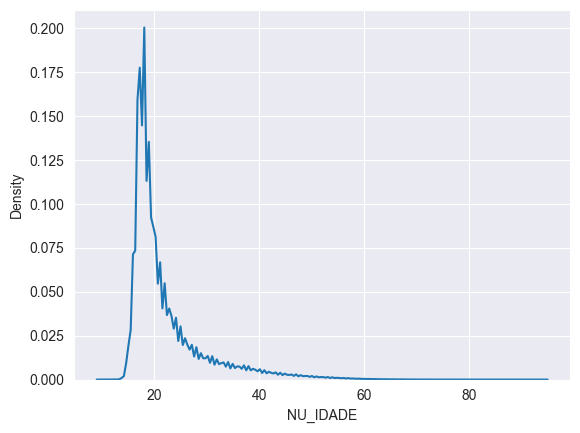

In [26]:
sns.kdeplot(data = df_enem, x = 'NU_IDADE')

<h3 style="color:cornflowerblue">Visualizing Gender</h3>

In [27]:
df_enem['TP_SEXO'].value_counts()

TP_SEXO
F    3031822
M    2063448
Name: count, dtype: int64

In [28]:
df_enem['TP_SEXO'].value_counts(normalize=True)

TP_SEXO
F   0.60
M   0.40
Name: proportion, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

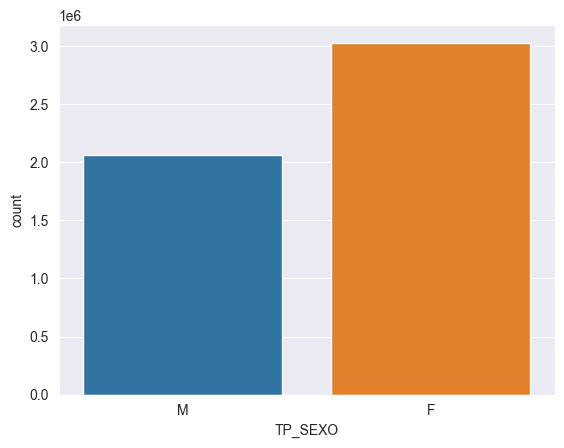

In [29]:
sns.countplot(data = df_enem, x = 'TP_SEXO')

<h3 style="color:cornflowerblue">Visualizing Civil State</h3>

<p>Considering the following:<ol type=1 start=0>
    <li> Not Informed
    <li> Single
    <li> Married / Stable Union
    <li> Divorced
    <li> Widowed
    </ol>
</p>

In [30]:
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

TP_ESTADO_CIVIL
0     206800
1    4398485
2     395855
3      87894
4       6236
Name: count, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

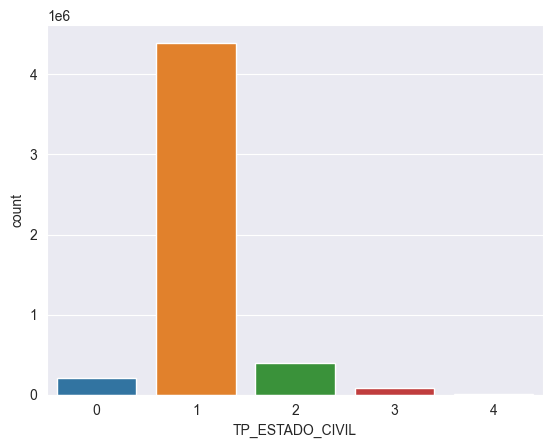

In [31]:
sns.countplot(data = df_enem, x = 'TP_ESTADO_CIVIL')

<h3 style="color:cornflowerblue">Visualizing Ethnicity</h3>

<p>Considering the following:<ol type=1 start=0>
    <li> Not Informed
    <li> White
    <li> Black
    <li> Brown
    <li> Yellow
    <li> Indigenous
    </ol>
</p>

In [32]:
df_enem['TP_COR_RACA'].value_counts().sort_index()

TP_COR_RACA
0     103201
1    1831779
2     648309
3    2364063
4     116162
5      31756
Name: count, dtype: int64

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

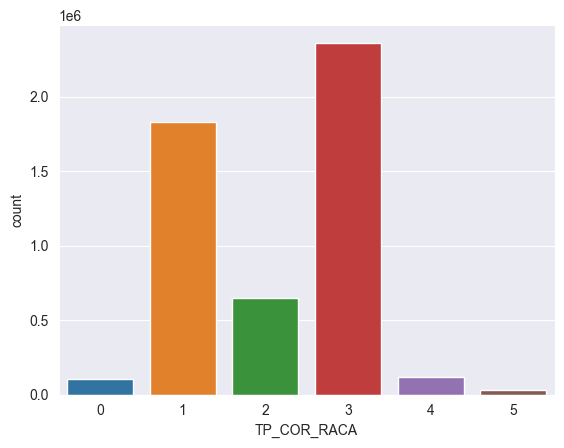

In [33]:
sns.countplot(data=df_enem, x='TP_COR_RACA')

<h3 style="color:cornflowerblue">Visualizing Region</h3>

In [34]:
ufs = df_enem['SG_UF_RESIDENCIA'].value_counts()
ufs

SG_UF_RESIDENCIA
SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: count, dtype: int64

In [35]:
df_ufs = pd.DataFrame({'uf':ufs.index, 'candidates': ufs.values})
df_ufs.head()

,uf,candidates
0,SP,813772
1,MG,538896
2,BA,398095
3,RJ,338710
4,CE,295870


In [36]:
fig = px.treemap(data_frame = df_ufs, path = ['uf'], values = 'candidates')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, b=25))
fig.show()

<h3 style="color:cornflowerblue">Visualizing Parents Education</h3>

<p>Considering the following:<ol type=A>
    <li> Never Studied
    <li> Did not finish 4th or 5th grade
    <li> Finish 4th or 5th grade, but not 8th or 9th
    <li> Finish 8th or 9th grade, but not high school 
    <li> Finish high school, but not university
    <li> Finish university, but not post graduation
    <li> Finish post graduation
    <li> Don't know
    </ol>
</p>

In [37]:
# Father or other male guardian

df_enem['Q001'].value_counts().sort_index()

Q001
A     290615
B    1135816
C     723518
D     586620
E    1308991
F     375721
G     229183
H     444806
Name: count, dtype: int64

In [38]:
# Relevance of candidates that don't know.

len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0]

0.08729782720052127

In [39]:
# Mother or other female guardian

df_enem['Q002'].value_counts().sort_index()

Q002
A     194625
B     854826
C     686198
D     667415
E    1633692
F     513711
G     399470
H     145333
Name: count, dtype: int64

In [40]:
# Relevance of candidates that don't know.

len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0]

0.028523120462703645

In [41]:
# New column for parents/guardians with higher education

df_enem["M_HIGHER_ED"] = df_enem["Q001"].isin(["F","G"])
df_enem["F_HIGHER_ED"] = df_enem["Q002"].isin(["F","G"])

df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,M_HIGHER_ED,F_HIGHER_ED
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,False,False
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,False,False
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,False,False
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,False,False
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,False,False


In [42]:
df_enem["M_HIGHER_ED"].value_counts(normalize=True) * 100

M_HIGHER_ED
False   88.13
True    11.87
Name: proportion, dtype: float64

In [43]:
df_enem["F_HIGHER_ED"].value_counts(normalize=True) * 100

F_HIGHER_ED
False   82.08
True    17.92
Name: proportion, dtype: float64

<Figure size 1000x800 with 0 Axes>

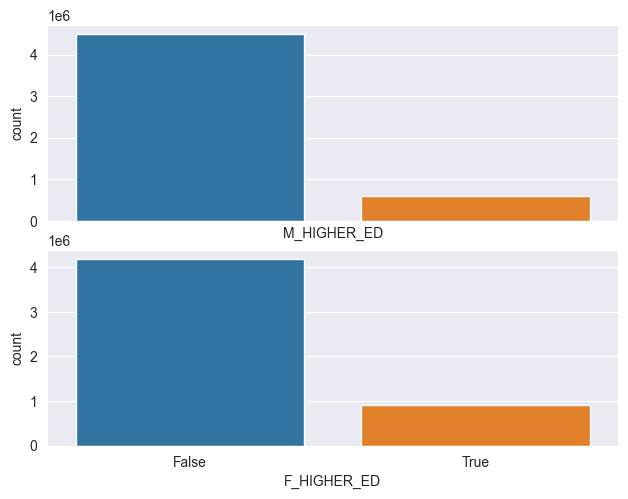

In [47]:
# Data visualization of higher education of parents/guardians

h_ed = ["M_HIGHER_ED", "F_HIGHER_ED"]
sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
figure,  axes = plt.subplots(len(h_ed), 1, sharex = True)
plt.tight_layout()

for i in range(0, len(h_ed)):
    sns.countplot(data=df_enem, ax=axes[i] , x=h_ed[i])

<h3 style="color:cornflowerblue">Visualizing Family Income</h3>

<p> Considering:
    <ol type=A>
    <li>Not Informed
    <li>Up to R$998,00
    <li>From R$998,01 to R$1497,00
    <li>From R$1497,01 to R$1996,00
    <li>From R$1996,01 to R$2495,00
    <li>From R$2495,01 to R$2994,00
    <li>From R$2994,01 to R$3992,00
    <li>From R$3992,01 to R$4990,00
    <li>From R$4990,01 to R$5988,00
    <li>From R$6986,01 to R$6986,00
    <li>From R$6986,01 to R$7984,00
    <li>From R$7984,01 to R$8982,00
    <li>From R$8982,01 to R$9980,00
    <li>From R$9980,01 to R$11976,00
    <li>From R$11976,01 to R$14970,00
    <li>From R$14970,01 to R$19960,00
    <li>More than R$19960,00
    </ol>
</p>

In [56]:
# Creating a column of family income

from string import ascii_uppercase

dict_inc = dict()

for i, letter in enumerate(ascii_uppercase):
    if letter == 'Q':
        dict_inc[letter] = i
        break
    dict_inc[letter] = i

df_enem['FAM_INC'] = df_enem['Q006'].map(dict_inc)

df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,M_HIGHER_ED,F_HIGHER_ED,FAM_INC
0,SP,36.00,M,1,3,1,BA,1,11,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SP,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B,False,False,0
1,BA,23.00,M,1,1,1,BA,1,5,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,False,False,2
2,CE,39.00,F,1,3,1,CE,1,13,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CE,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,False,False,1
3,TO,25.00,F,1,1,1,TO,1,4,1,NaN,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TO,1,1,1,1,483.80,503.60,537.30,392.00,1,1.00,120.00,120.00,120.00,100.00,0.00,460.00,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B,False,False,4
4,MG,22.00,F,1,1,1,MG,1,4,1,1.00,0,None,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MG,1,1,1,1,513.60,575.50,570.70,677.00,0,1.00,160.00,120.00,180.00,200.00,200.00,860.00,E,E,C,C,3,G,A,C,D,B,A,B,B,B,A,B,A,A,B,A,A,C,B,B,B,False,False,6


<Axes: xlabel='FAM_INC', ylabel='count'>

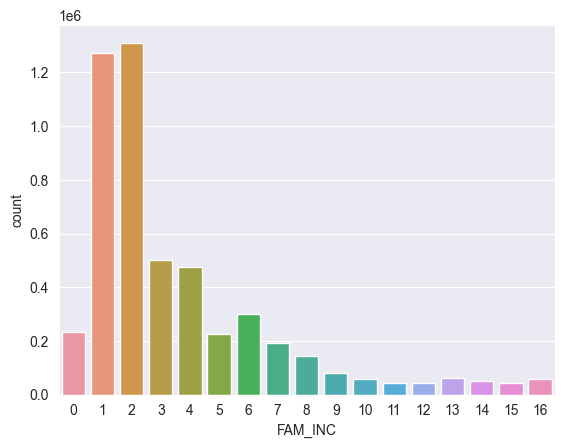

In [58]:
sns.countplot(data = df_enem, x='FAM_INC')

In [125]:
# Dataframe of general family income
df_income = df_enem["FAM_INC"].value_counts(normalize=True).sort_index() * 100
df_income

FAM_INC
0     4.55
1    24.99
2    25.74
3     9.81
4     9.33
5     4.44
6     5.93
7     3.79
8     2.82
9     1.59
10    1.14
11    0.87
12    0.85
13    1.21
14    0.99
15    0.85
16    1.12
Name: proportion, dtype: float64

In [131]:
# Excluding not informed(0), the amout of candidates with less than R$2500 of family income (E)
familiesperc = 0
for i in range(1,5):
    familiesperc = familiesperc + df_income.iloc[i]

familiesperc


69.8667391521941

<h2 style="color:cornflowerblue">Comparing Demographic Information with Candidate Grades</h2>
<p>Getting information and trying to find correpation between the candidate grades and:
    <ul type='circle'><li>Age***
    <li>Gender
    <li>Civil State***
    <li>Ethnicity
    <li>Region***
    <li>Special Care
    <li>Parents Education
    <li>Family Income


<h3 style="color:cornflowerblue">Age Information</h3>

In [61]:
# Creating a age Dataframe

df_age = df_enem.loc[:, columns_grades + ['NU_IDADE']]
df_age.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_IDADE
0,NaN,NaN,NaN,NaN,NaN,36.00
1,NaN,NaN,NaN,NaN,NaN,23.00
2,NaN,NaN,NaN,NaN,NaN,39.00
3,483.80,503.60,537.30,392.00,460.00,25.00
4,513.60,575.50,570.70,677.00,860.00,22.00


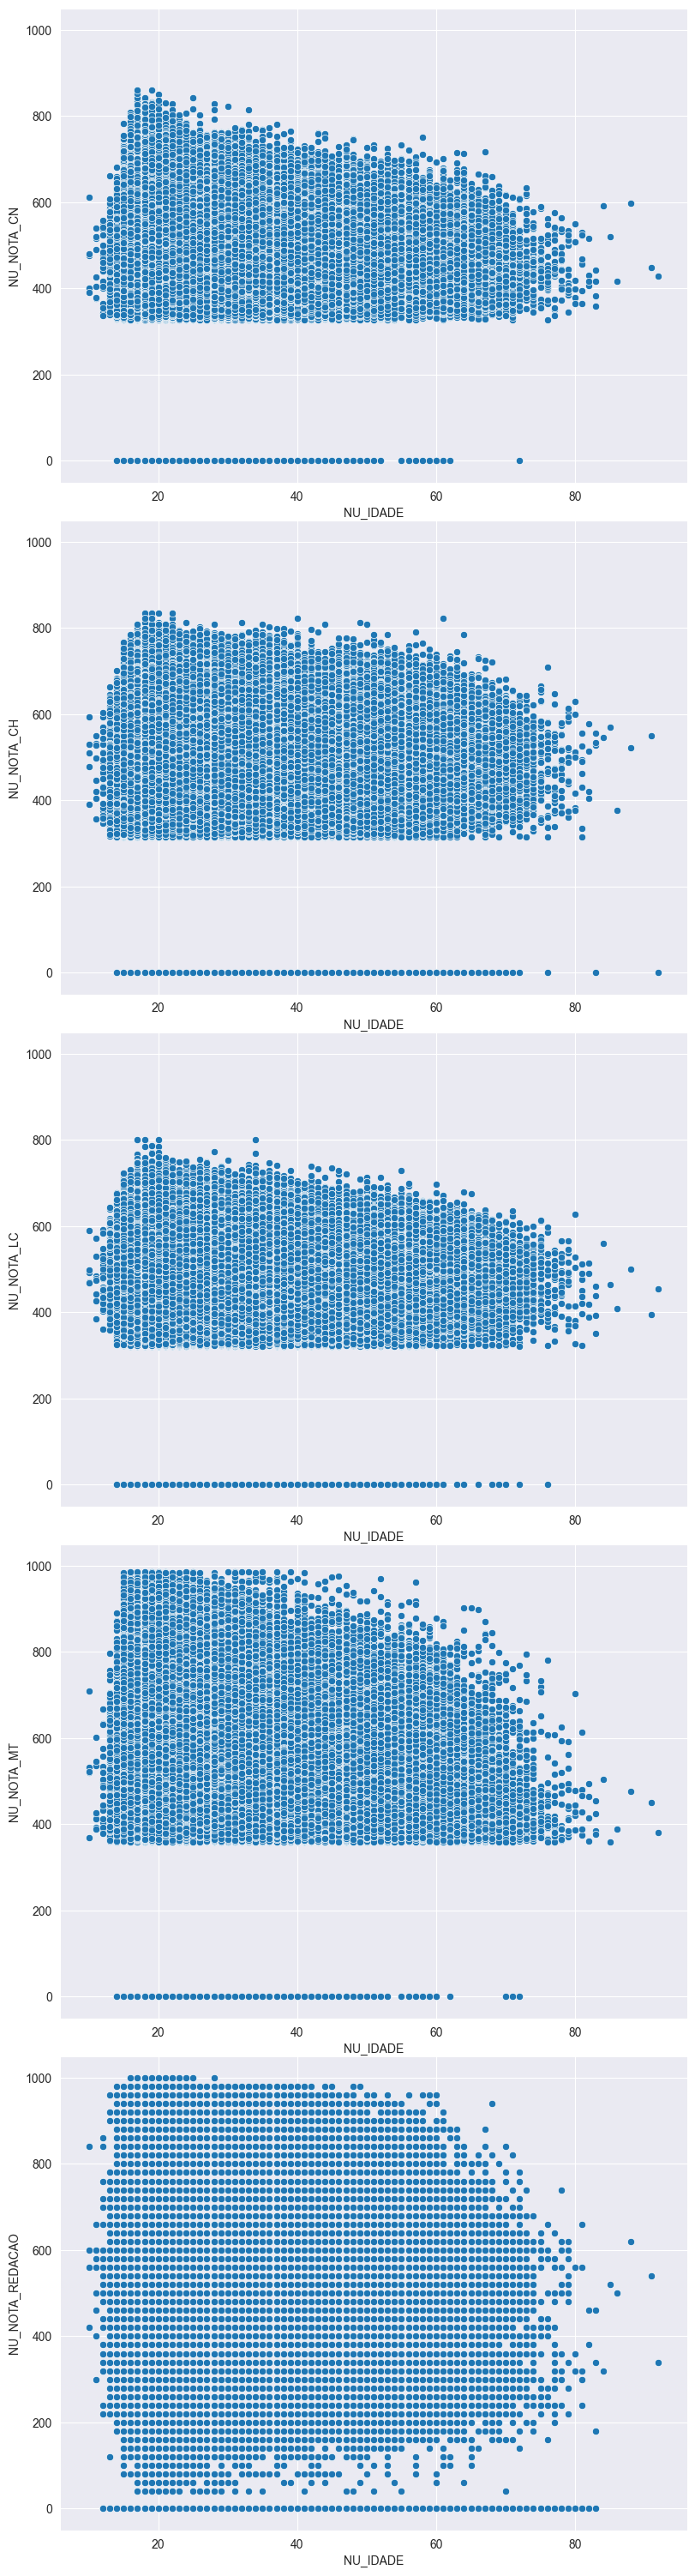

In [105]:
# Analyzing grades by age

sns.set_style("darkgrid")
figure, axes = plt.subplots(len(columns_grades), 1, sharey=True, figsize=(8,30))
plt.tight_layout()

for i in range(0,len(columns_grades)):
    sns.scatterplot(data = df_age, x = 'NU_IDADE', y=columns_grades[i], ax = axes[i])

<Axes: >

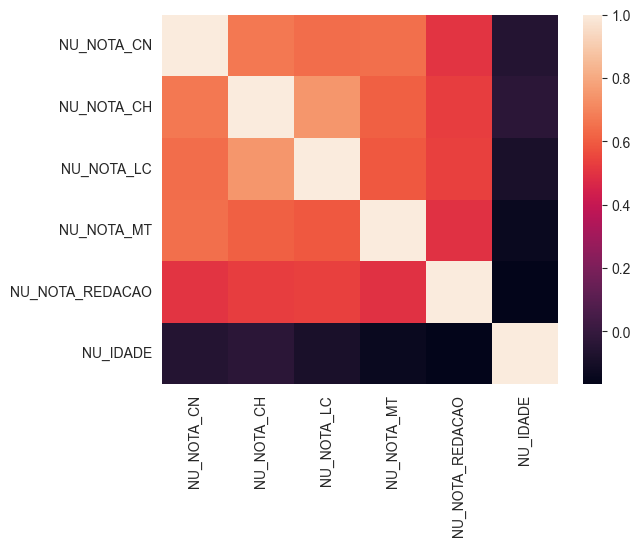

In [106]:
# Heatmap of the correlation
age_corr = df_age.corr()
sns.heatmap(age_corr)

<h3 style="color:cornflowerblue">Gender Information</h3>

In [59]:
# Creating a gender Dataframe

df_gender = df_enem.loc[:, columns_grades + ['TP_SEXO']]
df_gender.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,M
1,NaN,NaN,NaN,NaN,NaN,M
2,NaN,NaN,NaN,NaN,NaN,F
3,483.80,503.60,537.30,392.00,460.00,F
4,513.60,575.50,570.70,677.00,860.00,F


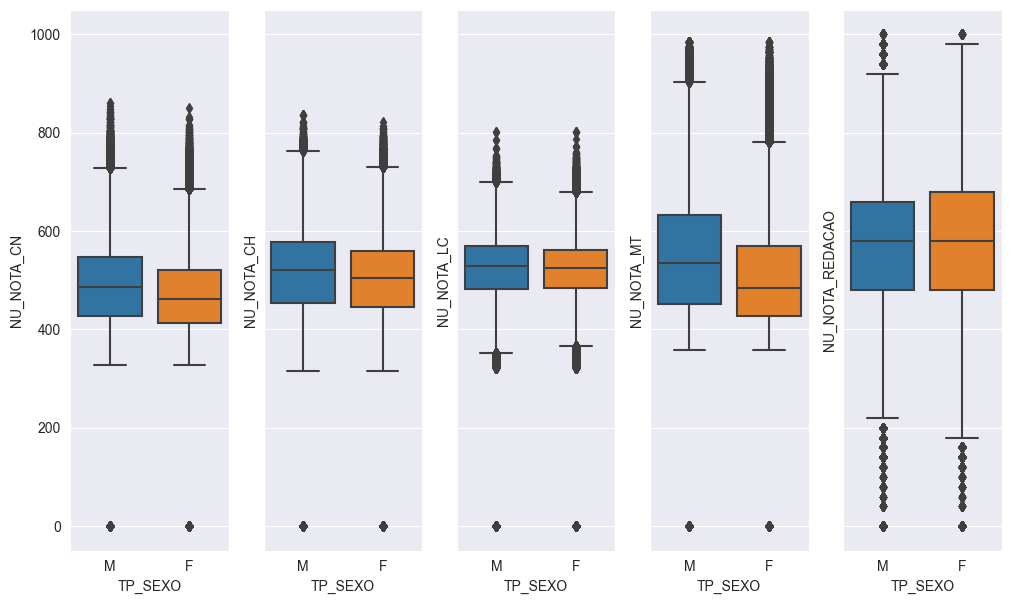

In [90]:
# Analyzing grades by gender

sns.set_style("darkgrid")
figure, axes = plt.subplots(1,len(columns_grades), sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(0,len(columns_grades)):
    sns.boxplot(data = df_gender, x = 'TP_SEXO', y=columns_grades[i], ax = axes[i])


<h3 style="color:cornflowerblue">Civil State Information</h3>

In [63]:
# Creating a Civil State Dataframe

df_cstate = df_enem.loc[:, columns_grades + ['TP_ESTADO_CIVIL']]
df_cstate.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESTADO_CIVIL
0,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,1
3,483.80,503.60,537.30,392.00,460.00,1
4,513.60,575.50,570.70,677.00,860.00,1


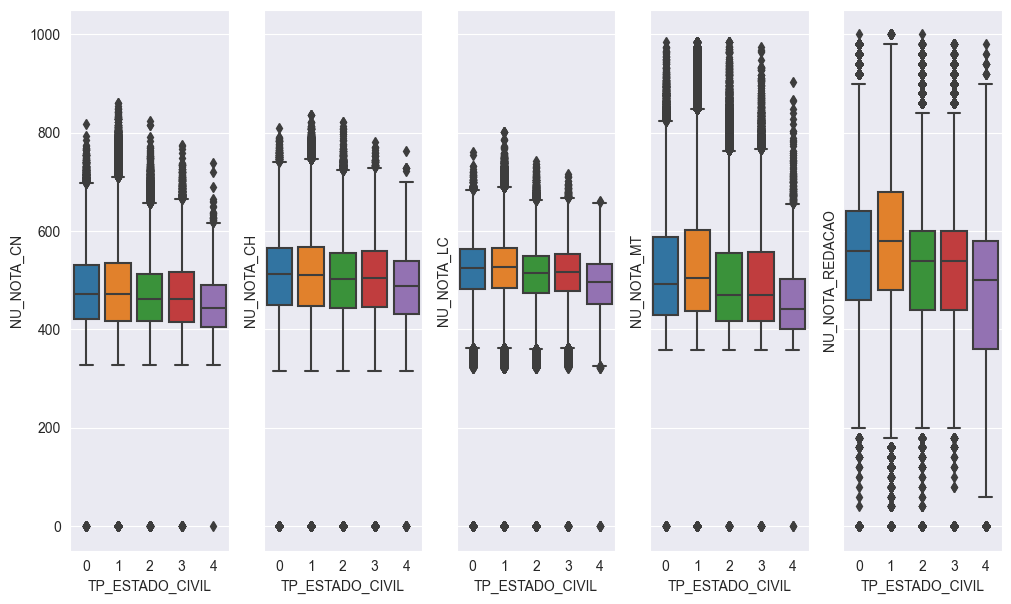

In [91]:
# Analyzing grades by civil state

sns.set_style("darkgrid")
figure, axes = plt.subplots(1,len(columns_grades), sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(0,len(columns_grades)):
    sns.boxplot(data = df_cstate, x = 'TP_ESTADO_CIVIL', y=columns_grades[i], ax = axes[i])

<h3 style="color:cornflowerblue">Ethnicity Information</h3>

In [67]:
# Creating a Ethnicity Dataframe

df_ethnic = df_enem.loc[: , columns_grades + ['TP_COR_RACA']]
df_ethnic.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,3
1,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,3
3,483.80,503.60,537.30,392.00,460.00,1
4,513.60,575.50,570.70,677.00,860.00,1


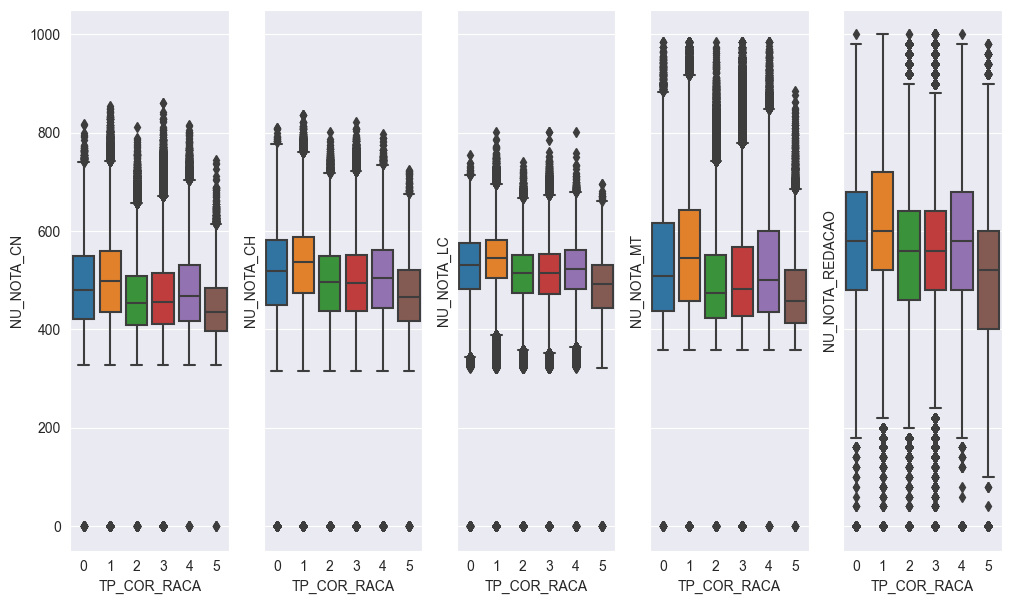

In [88]:
# Analyzing grades by Ethnicity

sns.set_style("darkgrid")
figure, axes = plt.subplots(1, len(columns_grades), sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(0, len(columns_grades)):
    sns.boxplot(data = df_ethnic, x='TP_COR_RACA', y=columns_grades[i], ax= axes[i])

<h3 style="color:cornflowerblue">Region Information</h3>

In [79]:
# creating region dataframe

df_region = df_enem.loc[:, columns_grades + ['SG_UF_RESIDENCIA']]
df_region.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,SG_UF_RESIDENCIA
0,NaN,NaN,NaN,NaN,NaN,SP
1,NaN,NaN,NaN,NaN,NaN,BA
2,NaN,NaN,NaN,NaN,NaN,CE
3,483.80,503.60,537.30,392.00,460.00,TO
4,513.60,575.50,570.70,677.00,860.00,MG


In [ ]:
# Analyzing Region


<h3 style="color:cornflowerblue">Special Care Information</h3>

In [80]:
# Creating special care dataframe

sc_list = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

df_specare = df_enem.loc[:, columns_grades]
df_specare['special care'] = df_enem.loc[:, sc_list].sum(axis=1) > 0
df_specare.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,special care
0,NaN,NaN,NaN,NaN,NaN,False
1,NaN,NaN,NaN,NaN,NaN,False
2,NaN,NaN,NaN,NaN,NaN,False
3,483.80,503.60,537.30,392.00,460.00,False
4,513.60,575.50,570.70,677.00,860.00,False


In [81]:
df_specare['special care'].value_counts()

special care
False    5062241
True       33029
Name: count, dtype: int64

In [82]:
df_specare['special care'].value_counts(normalize=True) * 100

special care
False   99.35
True     0.65
Name: proportion, dtype: float64

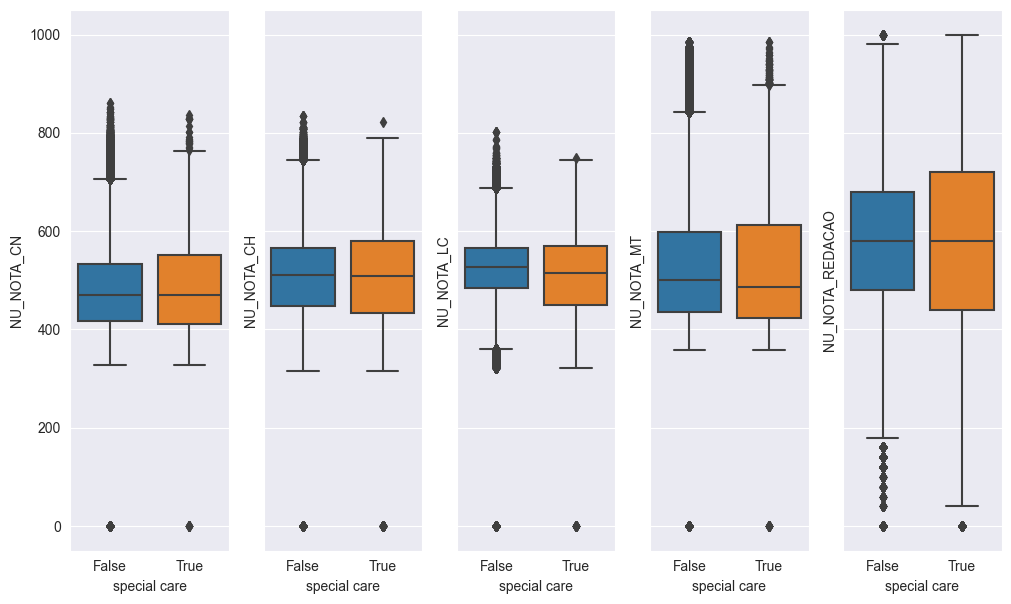

In [87]:
# Analyzing Special Care

sns.set_style('darkgrid')
figure, axes = plt.subplots(1,len(columns_grades), sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(0,len(columns_grades)):
    sns.boxplot(data=df_specare, x='special care',  y=columns_grades[i], ax = axes[i])

<h3 style="color:cornflowerblue">Parents Instruction Information</h3>

In [99]:
# Parents Instruction Dataframe

df_pinstruction = df_enem.loc[:, columns_grades + ['M_HIGHER_ED','F_HIGHER_ED']]
df_pinstruction.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,M_HIGHER_ED,F_HIGHER_ED
0,NaN,NaN,NaN,NaN,NaN,False,False
1,NaN,NaN,NaN,NaN,NaN,False,False
2,NaN,NaN,NaN,NaN,NaN,False,False
3,483.80,503.60,537.30,392.00,460.00,False,False
4,513.60,575.50,570.70,677.00,860.00,False,False


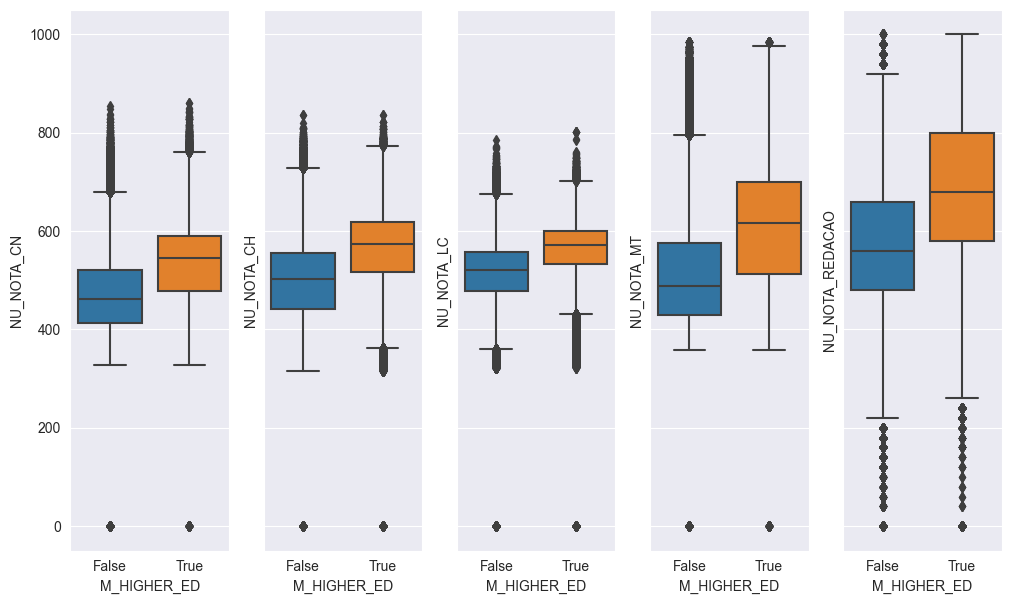

In [100]:
# Analyzing Parents Instruction (Father / Male Guardian)

sns.set_style('darkgrid')
figure, axes = plt.subplots(1, len(columns_grades), sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(0,len(columns_grades)):
    sns.boxplot(data = df_pinstruction, x="M_HIGHER_ED", y=columns_grades[i], ax=axes[i])

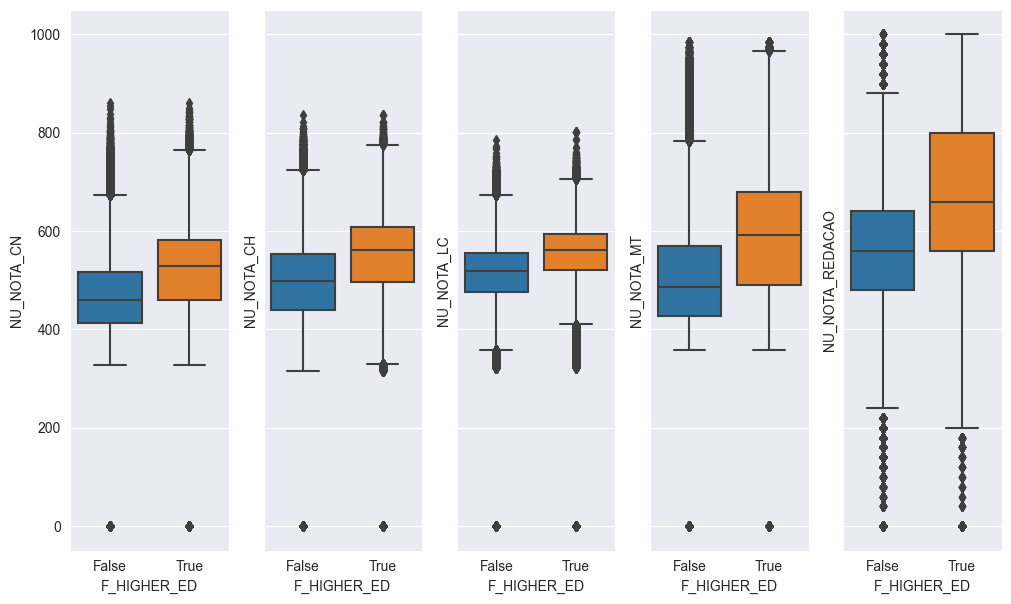

In [101]:
# Analyzing Parents Instruction (Mother / Female Guardian)

sns.set_style('darkgrid')
figure, axes = plt.subplots(1,len(columns_grades), sharey=True, figsize=(10,len(columns_grades)*6))
plt.tight_layout()

for i in range(0, len(columns_grades)):
    sns.boxplot(data = df_pinstruction, x='F_HIGHER_ED', y=columns_grades[i], ax=axes[i])

<h3 style="color:cornflowerblue">Family Income</h3>

In [107]:
# Creating a income dataframe

df_income = df_enem.loc[:, columns_grades + ['FAM_INC']]
df_income.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,FAM_INC
0,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,1
3,483.80,503.60,537.30,392.00,460.00,4
4,513.60,575.50,570.70,677.00,860.00,6


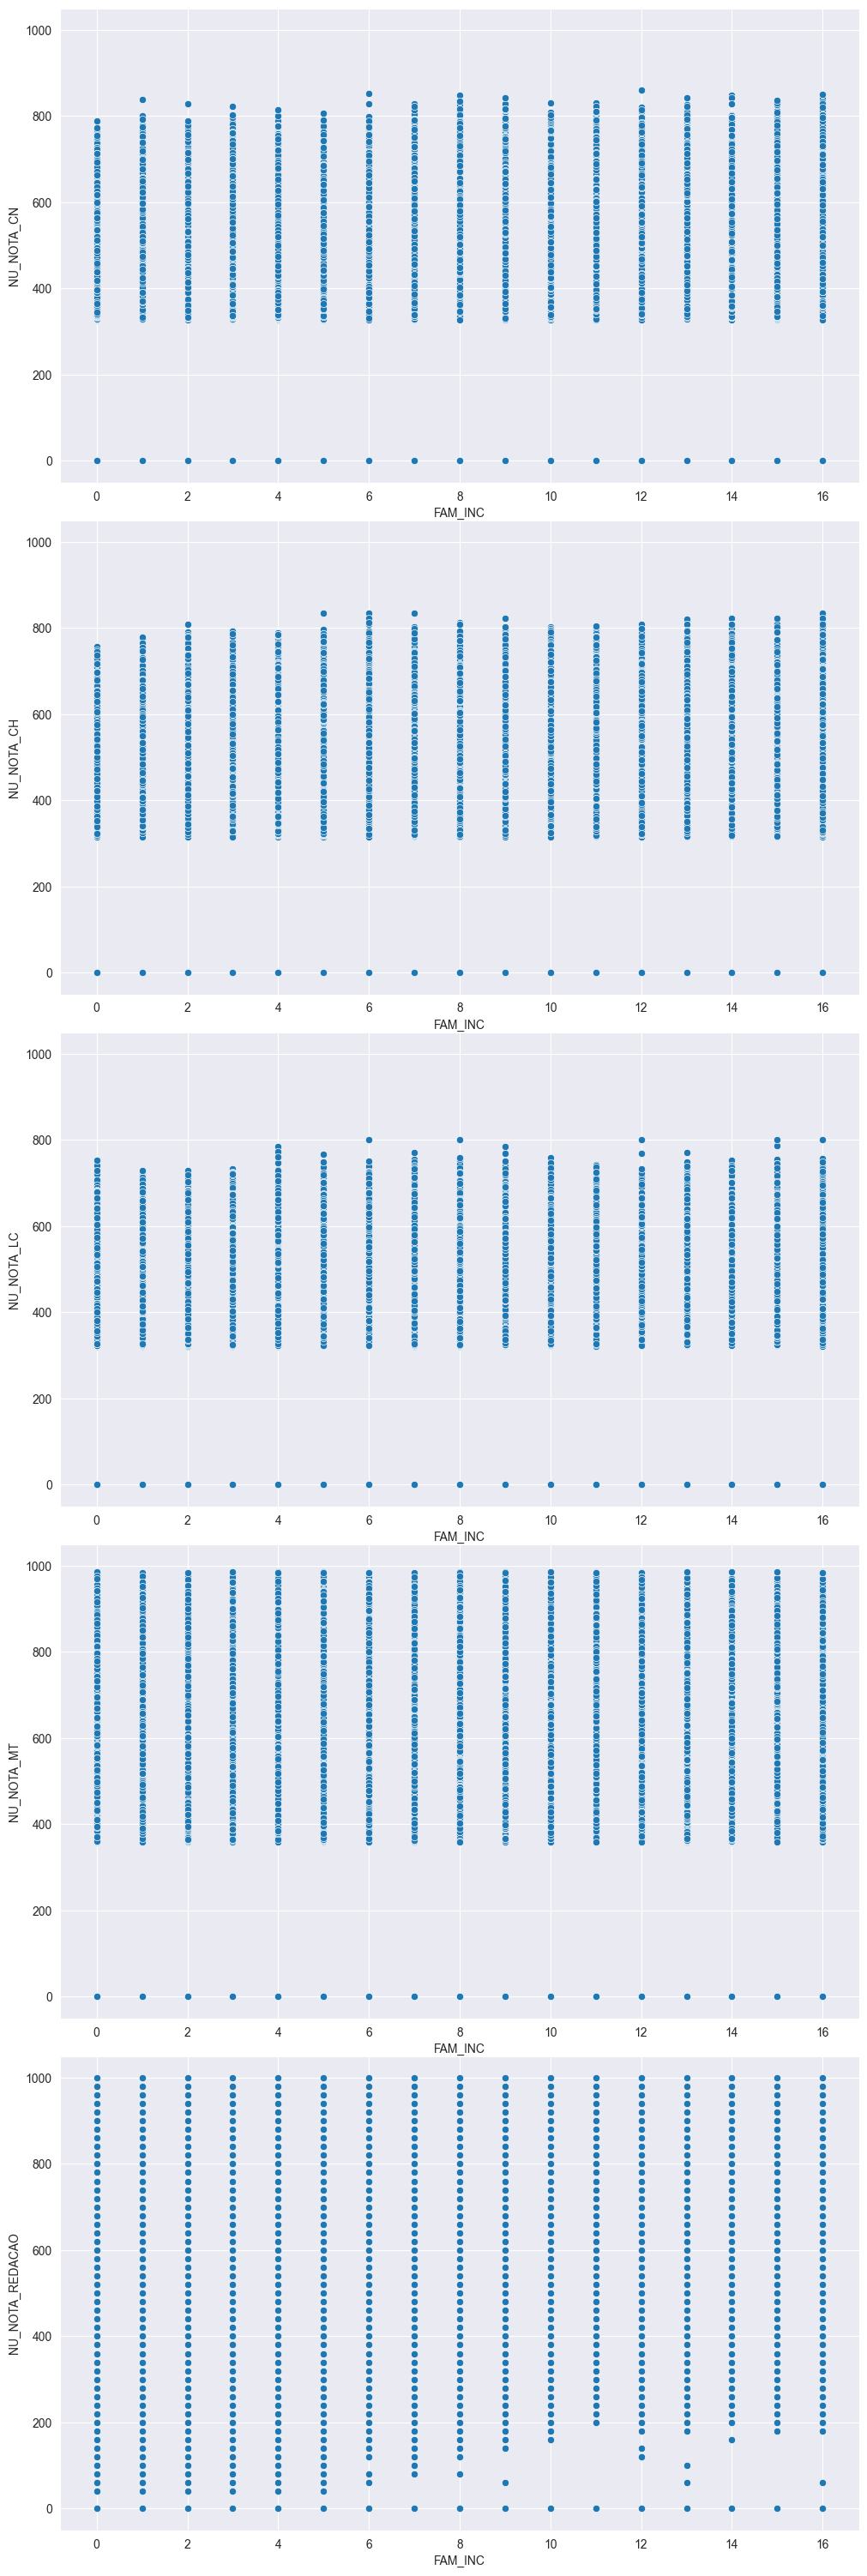

In [108]:
# Analyzing Family Income

sns.set_style('darkgrid')
figure, axes = plt.subplots(len(columns_grades), 1, sharey=True, figsize=(10,len(columns_grades)*6))
plt.tight_layout()

for i in range(0, len(columns_grades)):
    sns.scatterplot(data=df_income, x='FAM_INC', y=columns_grades[i], ax=axes[i])

<Axes: >

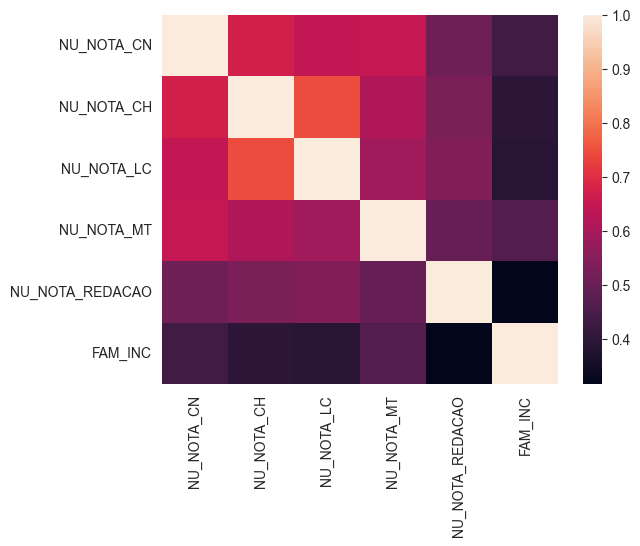

In [109]:
# Family Income Correlation

inc_corr = df_income.corr()
sns.heatmap(inc_corr)

<h2 style="color:cornflowerblue">Conclusions</h2>

<p>For the presented data, it can be seen that there are evidences of correlation of students grades with the following:
    <ul style = 'circle'><li>Ethnicity, specially for indigenous people;
    <li>Parents Instruction Level, specially on Math Grades;
    <li>Family Income, as the correlation in Math Grades are above 50%
    </ul>
</p>
<br>
<p>It is not clear if age, gender, region, special care have influence in the grades.</p>
<p>70% of the candidates income is bellow R$2500.</p>
<p>The "standard" candidate is female, age of 18, single, brown, with family income of R$1500 or bellow, with both parents without higher education.</p>